In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('TEST.csv')

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df

,windspeed,rainfall,area,yield,percentageofarea,darea,yielda,fgprice,dctrice
0,0,1.535972,2870.00,3.37,0.247070,709.091324,0.832626398,20.79,11135504
1,0,2.141071,491.00,4.36,0.244428,120.014173,1.065706303,20.79,2412279.37
2,7.116629346,5.809375,1330.88,4.42,0.312983,416.543187,1.383386094,20.79,10868283.84
3,67.08946747,3.908854,5767.00,4.65,0.567852,3274.800267,2.640510013,20.79,163091064.2
4,0,0.805469,4710.00,4.14,0.130472,614.521934,0.540153038,20.79,6260539.25
...,...,...,...,...,...,...,...,...,...
21016,0,0.522989,2936.00,0,0.264956,777.910078,0,14.32,0
21017,0,0.110000,156.00,2.85,0.101081,15.768650,0.288081111,14.32,59014.04
21018,10.51271508,0.225000,6376.00,6.88,0.131057,835.618326,0.901670967,14.32,9788183.48
21019,2.823089172,0.379861,2065.00,3.14,0.115129,237.741383,0.361505057,14.32,1116516.69


In [3]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','fgprice','percentageofarea','yielda','darea'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall','area', 'yield', 'fgprice'], axis=1)


In [4]:
X.shape, y.shape

((21021, 4), (21021, 1))

In [5]:
# First split the data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the temporary set into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:

X_train.shape, y_train.shape

((16816, 4), (16816, 1))

In [7]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16816 entries, 13628 to 15795
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dctrice  16816 non-null  object
dtypes: object(1)
memory usage: 262.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16816 entries, 13628 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   windspeed  16816 non-null  object 
 1   rainfall   16816 non-null  float64
 2   area       16816 non-null  float64
 3   yield      16705 non-null  object 
dtypes: float64(2), object(2)
memory usage: 656.9+ KB


In [8]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [9]:
X_train.shape, y_train.shape


((16816, 4), (16816, 1))

In [10]:
# Remove the rows with zero values from the training set and testing set
mask = X_train['windspeed'] != 0

# Apply the mask to X_train
X_train = X_train[mask]

# Apply the mask to y_train
y_train = y_train[mask]

In [11]:
X_train.shape, y_train.shape

((7867, 4), (7867, 1))

In [12]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [13]:
X_train.shape,y_train.shape

((7837, 4), (7837, 1))

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
# # Convert X_test to DataFrame

X_test_df = pd.DataFrame(X_val_scaled)

nan_rows = X_test_df[X_test_df.isna().any(axis=1)].index
X_test_scaled_final = X_test_df.drop(nan_rows)

print(np.where(pd.isnull(X_test_scaled_final)))


(array([], dtype=int64), array([], dtype=int64))


In [16]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [17]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [18]:
y_val.shape, X_val.shape

((2090, 1), (2090, 4))

In [19]:
from sklearn.inspection import permutation_importance

# Fit your SVR model
model = SVR(kernel="poly").fit(X_train, y_train)

# Perform permutation importance
results = permutation_importance(model, X_train_scaled, y_train, scoring='neg_mean_squared_error')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i, j in enumerate(importance):
    print('Feature %d: %s Importance: %.5f' % (i, X_train.columns[i], j))

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: U

Feature 0: windspeed Importance: 0.00000
Feature 1: rainfall Importance: 0.00000
Feature 2: area Importance: 2.50000
Feature 3: yield Importance: 0.00000


In [20]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
importance = np.abs(lasso.coef_)
print(importance)

[6.43372163e+06 8.89219871e+05 2.09448305e+08 1.65980646e+07]


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X_train

,windspeed,rainfall,area,yield
10790,15.665676,0.117560,370.0,2.06
17614,6.462579,2.849702,1725.0,3.89
6235,8.982324,3.426458,2487.0,4.20
5945,6.726178,0.854583,0.0,0.00
18061,12.384844,3.062153,1267.0,4.17
...,...,...,...,...
16023,3.000949,0.853191,17.0,5.58
14423,19.529917,0.503472,944.0,3.12
16850,1.709343,1.346094,3561.0,4.17
11284,14.460432,1.635185,6760.0,3.20


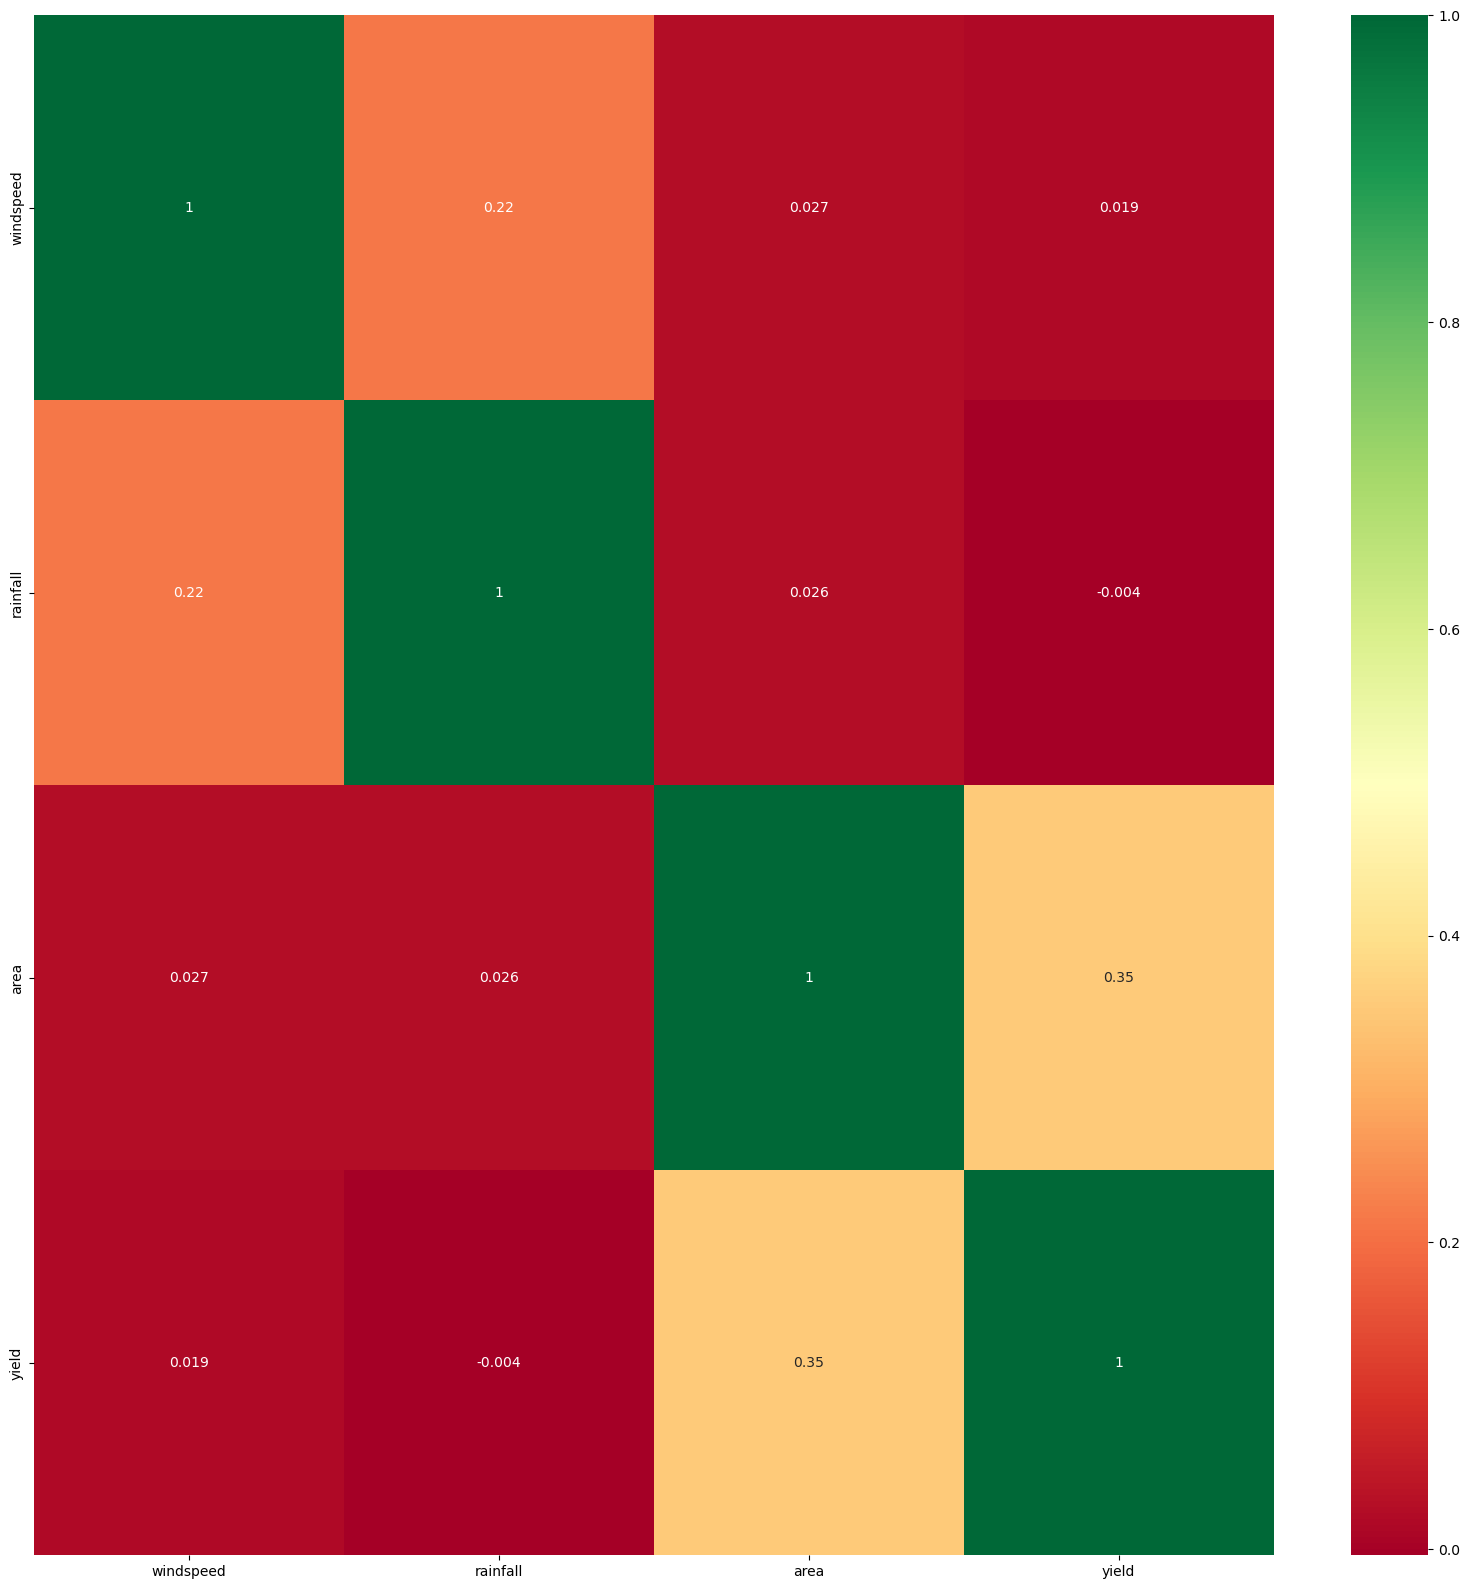

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
model = SVR(kernel='poly', C=0.0313, degree=2, gamma=0.0281, coef0=0.0)
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(max_depth=15, min_samples_split=3, min_samples_leaf=81, random_state=0)
model.fit(X_train, y_train)



# model = SVR(kernel='linear', C=3.8, gamma=2.7, verbose=True)
# model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
predictionsVal = model.predict(X_val)

# Evaluate the model

mae = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {mae}')

r2 = model.score(X_val, y_val)
print(f'R-squared (Validation): {r2}')



predictions = model.predict(X_test)


# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

r2 = model.score(X_test, y_test)
print(f'R-squared (Test): {r2}')


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (Validation): 6875649.463543431
R-squared (Validation): 0.446266209602326
Mean Absolute Error (Test): 7080671.34866962
R-squared (Test): 0.2143928762625712


In [24]:
print(['{:.2f}'.format(pred) for pred in predictions])

['572491.27', '279248.63', '1345743.65', '59450.77', '3387368.60', '1684191.34', '37048.12', '5782819.39', '2037522.61', '7679034.95', '125429.91', '3042041.57', '2084198.52', '10947607.06', '10994803.24', '1475981.91', '0.20', '1149922.27', '83215224.01', '82418017.75', '15946022.15', '0.21', '0.21', '4125518.93', '0.19', '230742.75', '24243.64', '664315.89', '10268064.23', '17500294.04', '9456384.39', '0.16', '1868515.70', '1247112.16', '57411.14', '290233.40', '1142536.04', '801154.18', '3575768.15', '0.21', '-1.77', '3932597.51', '321844.32', '0.20', '5320.70', '2580903.29', '775908.12', '0.19', '6471148.66', '2850133.69', '109261.96', '808383.51', '0.18', '33184.79', '0.21', '3761402.38', '5923597.93', '27060.87', '13787235.63', '13126864.96', '2113738.86', '90642.55', '5065436.64', '8419083.84', '10537.53', '419453.46', '16601152.67', '125204.24', '0.19', '0.21', '660891.77', '0.20', '1292410.95', '1760880.50', '3978037.75', '250121.62', '36642337.69', '165500.95', '14423085.48',

In [25]:
from sklearn.pipeline import make_pipeline
from joblib import dump

pipeline = make_pipeline(model)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'SVR.joblib')


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['SVR.joblib']